m
0.569142857142857
merr
0.004981598792617929
q
-0.012999999999999866
qerr
0.004850135000575725


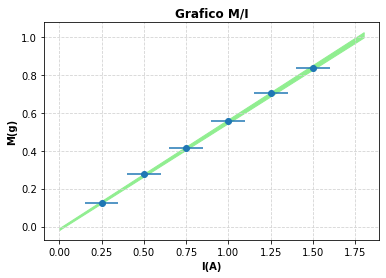

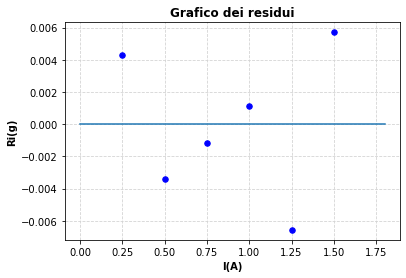

sigma_post_fit
0.0052098807225172674
B
4.9064039408866975
Berr
0.060276516854232264


In [8]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()

#gli errori sulle masse considerati sono 0.014*2
#la sigma post fit nelle due simulazioni risulta di poco minore
#quindi è una buona stima dell'errore, forse, un po sovrastimato

F = np.array([0.555,0.275,0.125,0.415,0.705,0.835])
F_err = np.ones(len(F))*0.01
I = np.array([1,0.5,0.25,0.75,1.25,1.5])
I_err = np.ones(len(I))*0.1

plt.title("Grafico M/I",fontweight="bold")
plt.xlabel("I(A)",fontweight="bold")
plt.ylabel("M(g)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(I, F, xerr=I_err, yerr=F_err, fmt='o')

fit,cov = np.polyfit(I,F, 1,w = 1/F_err,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit
deltaYtot = (F_err**2+(m*I_err)**2)**(1/2)
fit,cov = np.polyfit(I,F, 1,w = 1/deltaYtot,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit


print("m")
print(m)
print("merr")
print(merr)
print("q")
print(q)
print("qerr")
print(qerr)


x = np.linspace(0,max(I)*1.2,1000)

y = q + m*x 

y_erroreMin = (q-qerr) + (m-merr)*x

y_erroreMax = (q+qerr) + (m+merr)*x

plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightgreen",zorder=1)
plt.show()
fig.savefig(f'Analisi_Lunghezza_L',dpi = 300)


Ff = q+m*I

Ri = Ff-F

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui",fontweight="bold")
plt.xlabel("I(A)",fontweight="bold")
plt.ylabel("Ri(g)",fontweight="bold")
plt.plot(np.linspace(0,max(I)*1.2,1000),np.zeros(1000))
plt.scatter(I,Ri, s=30, color='blue',zorder=3)
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'Residui_Parte1_SET1.pdf',dpi = 300)

sigma_post_fit = (np.sum((Ff-F)**2)/(len(Ff)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)
print("B")
print(m/(0.116))
print("Berr")
print(m/0.116*((merr/m)**2 + (0.001/(0.116))**2)**(1/2))